<a href="https://colab.research.google.com/github/mohiteprathamesh1996/Telco-Customer-Churn/blob/main/churn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [2]:
#from google.colab import files

#uploaded = files.upload()

df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Start H2O

In [4]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size="25G")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmzrzqqjo
  JVM stdout: /tmp/tmpmzrzqqjo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmzrzqqjo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_1mhawd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,25 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [5]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
h2o_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824243,,,,,,,,,,,,,64.76169246059902,2283.3004408418697,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094442,,,,,,,,,,,,,30.09004709767848,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Split data into training, test and validation

In [7]:
train, test, valid = h2o_df.split_frame(ratios=[0.7, 0.15])

#### Begin model training

In [8]:
aml = H2OAutoML(max_models = 10, 
                seed = 10,
                exclude_algos = ["DeepLearning"], 
                verbosity="info",
                nfolds=0, 
                balance_classes=True, 
                project_name="Final")

y = "Churn"
x = list(df.columns)
x.remove(y)
x.remove("customerID")


aml.train(x=x, 
          y=y,
          training_frame = train, 
          validation_frame=valid)

AutoML progress: |
15:46:11.926: Project: Final
15:46:11.927: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:46:11.930: Setting stopping tolerance adaptively based on the training frame: 0.014281343114939598
15:46:11.932: Build control seed: 10
15:46:11.934: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
15:46:12.37: training frame: Frame key: automl_training_py_2_sid_8472    cols: 21    rows: 4416  chunks: 1    size: 200899  checksum: -3802321203956389334
15:46:12.37: validation frame: Frame key: py_4_sid_8472    cols: 21    rows: 1068  chunks: 1    size: 46709  checksum: -2578117189002673666
15:46:12.50: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_8472    cols: 21    rows: 487  chunks: 1    size: 32444  checksum: 3858976052613692332
15:46:12.50: blending frame: NULL
15:46:12.50: response column: Churn
15:46:12.50: fold column: n

#### Leaderboard

In [9]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210203_154611,0.871403,0.381276,0.677443,0.217779,0.352244,0.124076
GBM_5_AutoML_20210203_154611,0.865293,0.388499,0.69081,0.199591,0.354718,0.125825
GBM_2_AutoML_20210203_154611,0.856807,0.402992,0.657816,0.235536,0.361372,0.13059
XGBoost_3_AutoML_20210203_154611,0.855989,0.397954,0.685646,0.222928,0.359496,0.129237
GBM_1_AutoML_20210203_154611,0.854155,0.403978,0.664993,0.223967,0.361016,0.130332
GBM_3_AutoML_20210203_154611,0.85137,0.412404,0.66872,0.220022,0.364575,0.132915
XGBoost_2_AutoML_20210203_154611,0.848486,0.412671,0.648878,0.221547,0.366942,0.134647
GBM_4_AutoML_20210203_154611,0.846994,0.42496,0.665176,0.22074,0.368416,0.13573
DRF_1_AutoML_20210203_154611,0.843414,0.430169,0.649196,0.223359,0.375828,0.141247
XGBoost_1_AutoML_20210203_154611,0.829304,0.439232,0.632938,0.254497,0.378352,0.14315


#### Feature importance plot

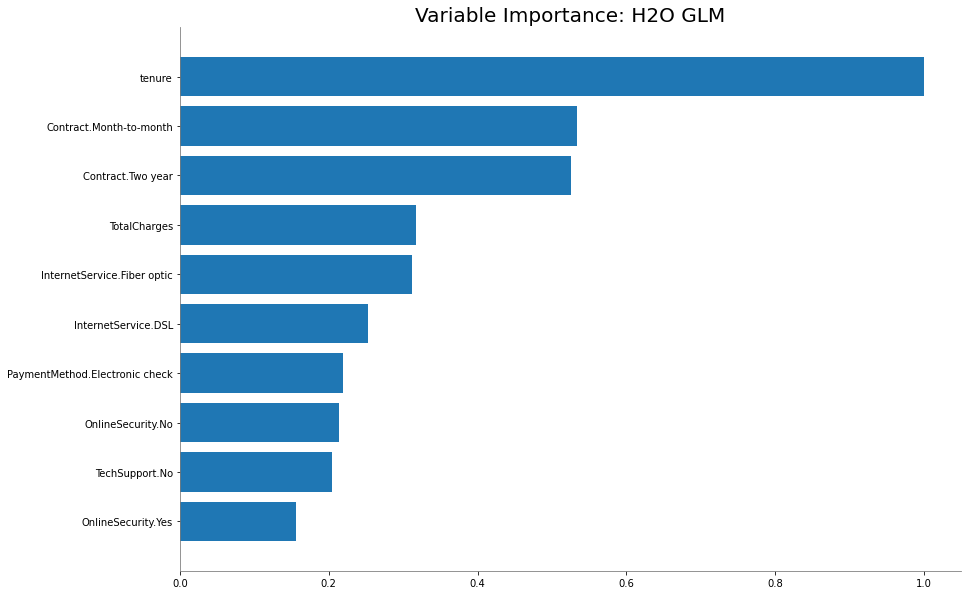

In [12]:
model = h2o.get_model("GLM_1_AutoML_20210203_154611")

model.varimp_plot(num_of_features=10)